Jonathan Elsner \
October 17th, 2024

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import pint
import pint_pandas

pint_pandas.PintType.ureg.setup_matplotlib()

In [2]:
units = pint_pandas.PintType.ureg

w = channel_width = 5.5 * units.cm
g = 9.81 * units.m / units.s**2
water_density = 997 * units.kg / units.m**3

# Hydraulic Jump

## Part 1

In supercritical water flow, the water is uniform, relatively smooth, but with standing surface gravity waves due to the walls of the channel. In subcritical water flow, the water flow is slower moving with a rougher surface and greater depth.

## Part 2

![Point tracking used to determine the water level.](./lab3_image_analysis_thumbnail.png)

Data Analysis:

In [3]:
measured_volume = 350 * units.ml
measured_time = 2.13 * units.s
Q = measured_volume / measured_time

In [49]:
depths = pd.read_csv('lab3_image_data.csv', header=0, names={'h': 'y'})
depths.index = -depths.index.astype('pint[cm]')
depths['h'] = depths['h'].astype('pint[cm]')
depths

,h
-0.0148,0.299
0.548,0.326
1.05,0.333
1.6,0.347
2.15,0.362
...,...
29.6,1.73
30.0,1.79
30.6,1.55
31.1,1.63


In [5]:
depths['A'] = depths['h'] * channel_width
depths['U_avg'] = (Q / depths['A']).pint.to_reduced_units()
depths['froude'] = (depths['U_avg'] / np.sqrt(g * depths['h'])).pint.to_reduced_units()
depths['PE'] = (water_density * g * depths['h']).pint.to('J/m^3')
depths['KE'] = (0.5 * water_density * depths['U_avg']**2).pint.to('J/m^3')
depths['E'] = depths['PE'] + depths['KE']

In [6]:
depths

,h,A,U_avg,froude,PE,KE,E
-0.0148,0.299,1.6444999999999999,99.92049183720955,5.834242347542155,29.2439043,497.70761874614465,526.9515230461446
0.548,0.326,1.7930000000000001,91.64486828014003,5.124657528909006,31.8846582,418.6792768218982,450.5639350218982
1.05,0.333,1.8315000000000001,89.71839957755451,4.963921415047591,32.569298100000005,401.262152454473,433.831450554473
1.6,0.347,1.9084999999999999,86.09863705857538,4.666561949459919,33.9385779,369.53681887171285,403.47539677171284
2.15,0.362,1.9909999999999999,82.53101397603773,4.379538937670646,35.4056634,339.5467081554598,374.95237155545976
...,...,...,...,...,...,...,...
29.6,1.73,9.515,17.269495410014827,0.41920079059173676,169.203861,14.867038265068679,184.07089926506868
30.0,1.79,9.845,16.69062964208137,0.3983012792446929,175.072203,13.887069324778894,188.9592723247789
30.6,1.55,8.525,19.274985199564938,0.4943035169636894,151.598835,18.520523964005854,170.11935896400587
31.1,1.63,8.965,18.32897365602801,0.4583633038418654,159.423291,16.74717107287593,176.17046207287592


In [7]:
depths.dtypes

h                  pint[centimeter]
A             pint[centimeter ** 2]
U_avg     pint[centimeter / second]
froude          pint[dimensionless]
PE         pint[joule / meter ** 3]
KE         pint[joule / meter ** 3]
E          pint[joule / meter ** 3]
dtype: object

In [19]:
hydraulic_jump_location = 17.5 * units.cm

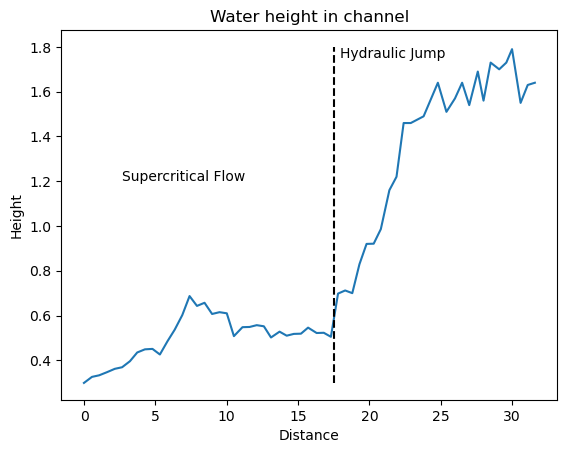

In [31]:
ax = depths.h.plot()

ax.text(7, 1.2, 'Supercritical Flow', horizontalalignment='center')

ax.vlines(hydraulic_jump_location, 0.3, 1.8, linestyle='--', color='black')
ax.text(hydraulic_jump_location * 1.025, 1.75, 'Hydraulic Jump')

ax.set_xlabel('Distance')
ax.set_ylabel('Height')
ax.set_title('Water height in channel')
plt.show()

## Part 3


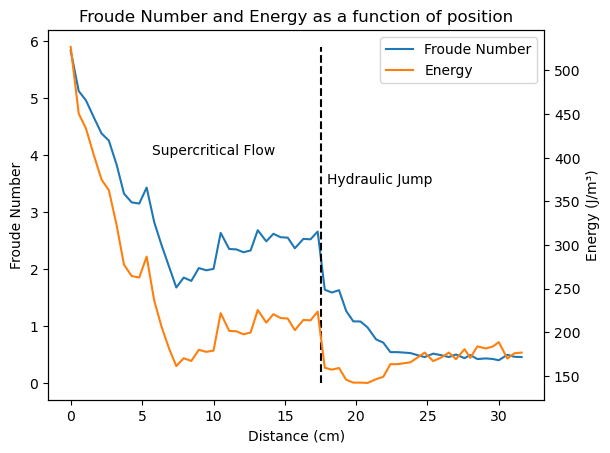

In [34]:
fig, ax = plt.subplots()
f_line, = ax.plot(depths.index, depths['froude'], label="Froude Number")

e_ax = ax.twinx()
e_line, = e_ax.plot(depths.index, depths['E'], label='Energy', color='tab:orange')
e_ax.set_ylabel(f'Energy ({depths['E'].pint.units:~P})')

ax.text(10, 4, 'Supercritical Flow', horizontalalignment='center')

ax.vlines(hydraulic_jump_location, 0, 5.9, linestyle='--', color='black')
ax.text(hydraulic_jump_location * 1.025, 3.5, 'Hydraulic Jump')

ax.legend(handles=[f_line, e_line])
ax.set_xlabel(f'Distance ({depths.index.to_series().pint.units:~P})')
ax.set_ylabel('Froude Number')
ax.set_title('Froude Number and Energy as a function of position')

plt.show()

## Part 4

When the hydraulic jump occurs, Energy drops because the average velocity of the water decreases. Energy isn't conserved because <font color=red>because why?</font>

## Part 5

![Sketch of the control volume around the hydraulic jump](./hw3-1-6-schematic.png)

Here we go! Let's do a derivation!

Starting from Reynold's transport theorem, with conservation of momentum:

$$\begin{align*}
\frac{d}{dt} \int_{V^*}\rho \vec u dV = \int_{V^*} \rho \vec g dV + \int_{A*}P dA + \int_{A^*} \rho \vec u (-\vec u \cdot \vec n) dA &= 0 \\
0 + \rho w \left(\int_0^{h_1} g(h_1 - h) dh - \int_0^{h_2} g(h_2 - h) dh \right) + \rho \left[\vec u_1 (-\vec u_1 \cdot \vec n_1) A_1 + \vec u_2 (-\vec u_2 \cdot \vec n_2 ) A_2 \right] &= 0 \\
\rho w g\left[\left(h_1^2 - \frac{h_1^2}{2}\right) - \left(h_2^2 - \frac{h_2^2}{2}\right) \right] + \rho w \left[u_1^2 h_1 - u_2^2 h_2\right] &= 0 \\
g(h_2^2 - h_1^2) - 2(u_1^2 h_1 - u_2^2 h_2) &= 0 \\

\end{align*}$$

## Part 6

since $ Q = u_1 h_1 = u_2 h_2 $ (technically there's a width term $w$ in there, but it just cancels out):

$$\begin{split}
g(h_2^2 - h_1^2) - 2Q^2\left(\frac{1}{h_1} - \frac{1}{h_2}\right) &= 0 \\
g h_1 h_2 (h_2 + h_1)(h_2 - h_1) - 2Q^2 (h_2 - h_1) &= 0 \\
g h_1 h_2 (h_2 + h_1) - 2Q^2 &= 0 \\
(h_2 + h_1) - \frac{2(u_1 h_1)^2}{g h_1 h_2} &= 0 \\
\end{split}$$

using the fact that $\text{Fr}_1^2 = u_1^2/gh_1$,

$$\begin{split}
(h_2 + h_1) - \frac{2 h_1^2}{h_2} \text{Fr}_1^2 &= 0 \\
\frac{h_2^2}{h_1^2} + \frac{h_2}{h_1} - 2 \text{Fr}_1^2 &= 0
\end{split}$$

This is quadratic in $h_2/h_1$, so using the quadratic formula, we obtain the result:

$$ \frac{h_2}{h_1} = \frac{1}{2}\left(\sqrt{1 + 8\text{Fr}_1^2} - 1 \right) $$

## Part 7

In [10]:
data = pd.read_csv('./lab3_data.csv', header=[0,1])
data = data.pint.quantify(level=-1) # Retrieve units using pint

In [11]:
data['Q'] = data['V'] / data['t']
data['U_avg_1'] = (data['Q'] / (data['h_1'] * channel_width)).pint.to_reduced_units()
data['U_avg_2'] = (data['Q'] / (data['h_2'] * channel_width)).pint.to_reduced_units()
data['froude_1'] = (data['U_avg_1'] / np.sqrt(g * data['h_1'])).pint.to_reduced_units()
data['froude_2'] = (data['U_avg_2'] / np.sqrt(g * data['h_2'])).pint.to_reduced_units()

In [12]:
data

,V,t,h_1,h_2,Q,U_avg_1,U_avg_2,froude_1,froude_2
0,475,2.64,0.8,2.0,179.9242424242424,40.89187327823691,16.356749311294763,1.459679501098389,0.3692729501863329
1,490,2.33,0.6,2.5,210.30042918454936,63.72740278319678,15.294576667967226,2.6267339678594315,0.30883957974200804
2,525,2.09,0.7,2.4,251.19617224880383,65.24575902566333,19.03001304915181,2.4898246604367227,0.39219220854702297
3,535,2.03,0.9,2.7,263.54679802955667,53.24177737970842,17.74725912656947,1.7918299307040284,0.34483783094466647
4,350,2.13,0.5,1.5,164.3192488262911,59.75245411865131,19.917484706217103,2.697964564148627,0.5192235224584272


In [13]:
data.dtypes

V                    pint[milliliter]
t                        pint[second]
h_1                  pint[centimeter]
h_2                  pint[centimeter]
Q           pint[milliliter / second]
U_avg_1     pint[centimeter / second]
U_avg_2     pint[centimeter / second]
froude_1          pint[dimensionless]
froude_2          pint[dimensionless]
dtype: object

In [16]:
def height_ratio(froude):
    """Computes the ratio of the depths of water before and after hydraulic jump for the given Froude Number"""
    return 0.5 * (np.sqrt(1 + 8 * froude**2) - 1)

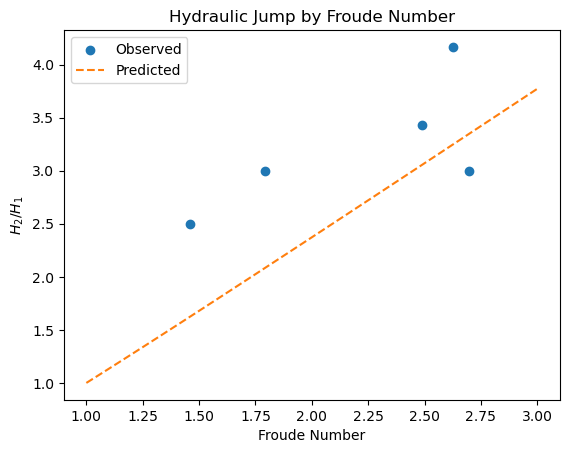

In [15]:
ax = plt.gca()

ax.scatter(data['froude_1'], data['h_2'] / data['h_1'], label='Observed')

x = np.linspace(1, 3, 100)
ax.plot(x, height_ratio(x), linestyle='--', color='tab:orange', label='Predicted')

ax.set_title('Hydraulic Jump by Froude Number')
ax.set_xlabel('Froude Number')
ax.set_ylabel('$h_2 / h_1$')
ax.legend()

plt.show()

<font color=red>TODO: what does this mean?</font>

# Streamlines, strain, and rotation rate tensors

## Part 1

Since $ \vec u = \langle x^2/y, y^2/x \rangle $, then

$$\begin{split}
\frac{dx}{x^2/y} &= \frac{dy}{y^2/x} \\
y \frac{dx}{x^2} &= x \frac{dy}{y^2} \\
\int_{x_0}^x \frac{dx}{x^3} &= \int_{y_0}^y \frac{dy}{y^3} \\
\frac{1}{2x^2} - \frac{1}{2x_0^2} &= \frac{1}{2y^2} - \frac{1}{2y_0^2} \\
\frac{y_0^2}{x^2} &= \frac{x_0^2}{y^2}
\end{split}$$


## Part 2

The strain rate tensor is:

$$ S = \frac{1}{2} \begin{bmatrix} \frac{4x}{y} & \frac{-x^2}{y^2} + \frac{y^2}{x^2} \\
\frac{-y^2}{x^2} + \frac{-x^2}{y^2} & \frac{4y}{x}\end{bmatrix}$$

and the rotation rate tensor is:

$$ R = \begin{bmatrix}0 & \frac{y^2}{x^2} - \frac{x^2}{y^2} \\
\frac{x^2}{y^2} - \frac{y^2}{x^2} & 0 \end{bmatrix}$$

## Part 3